In [11]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using ca


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


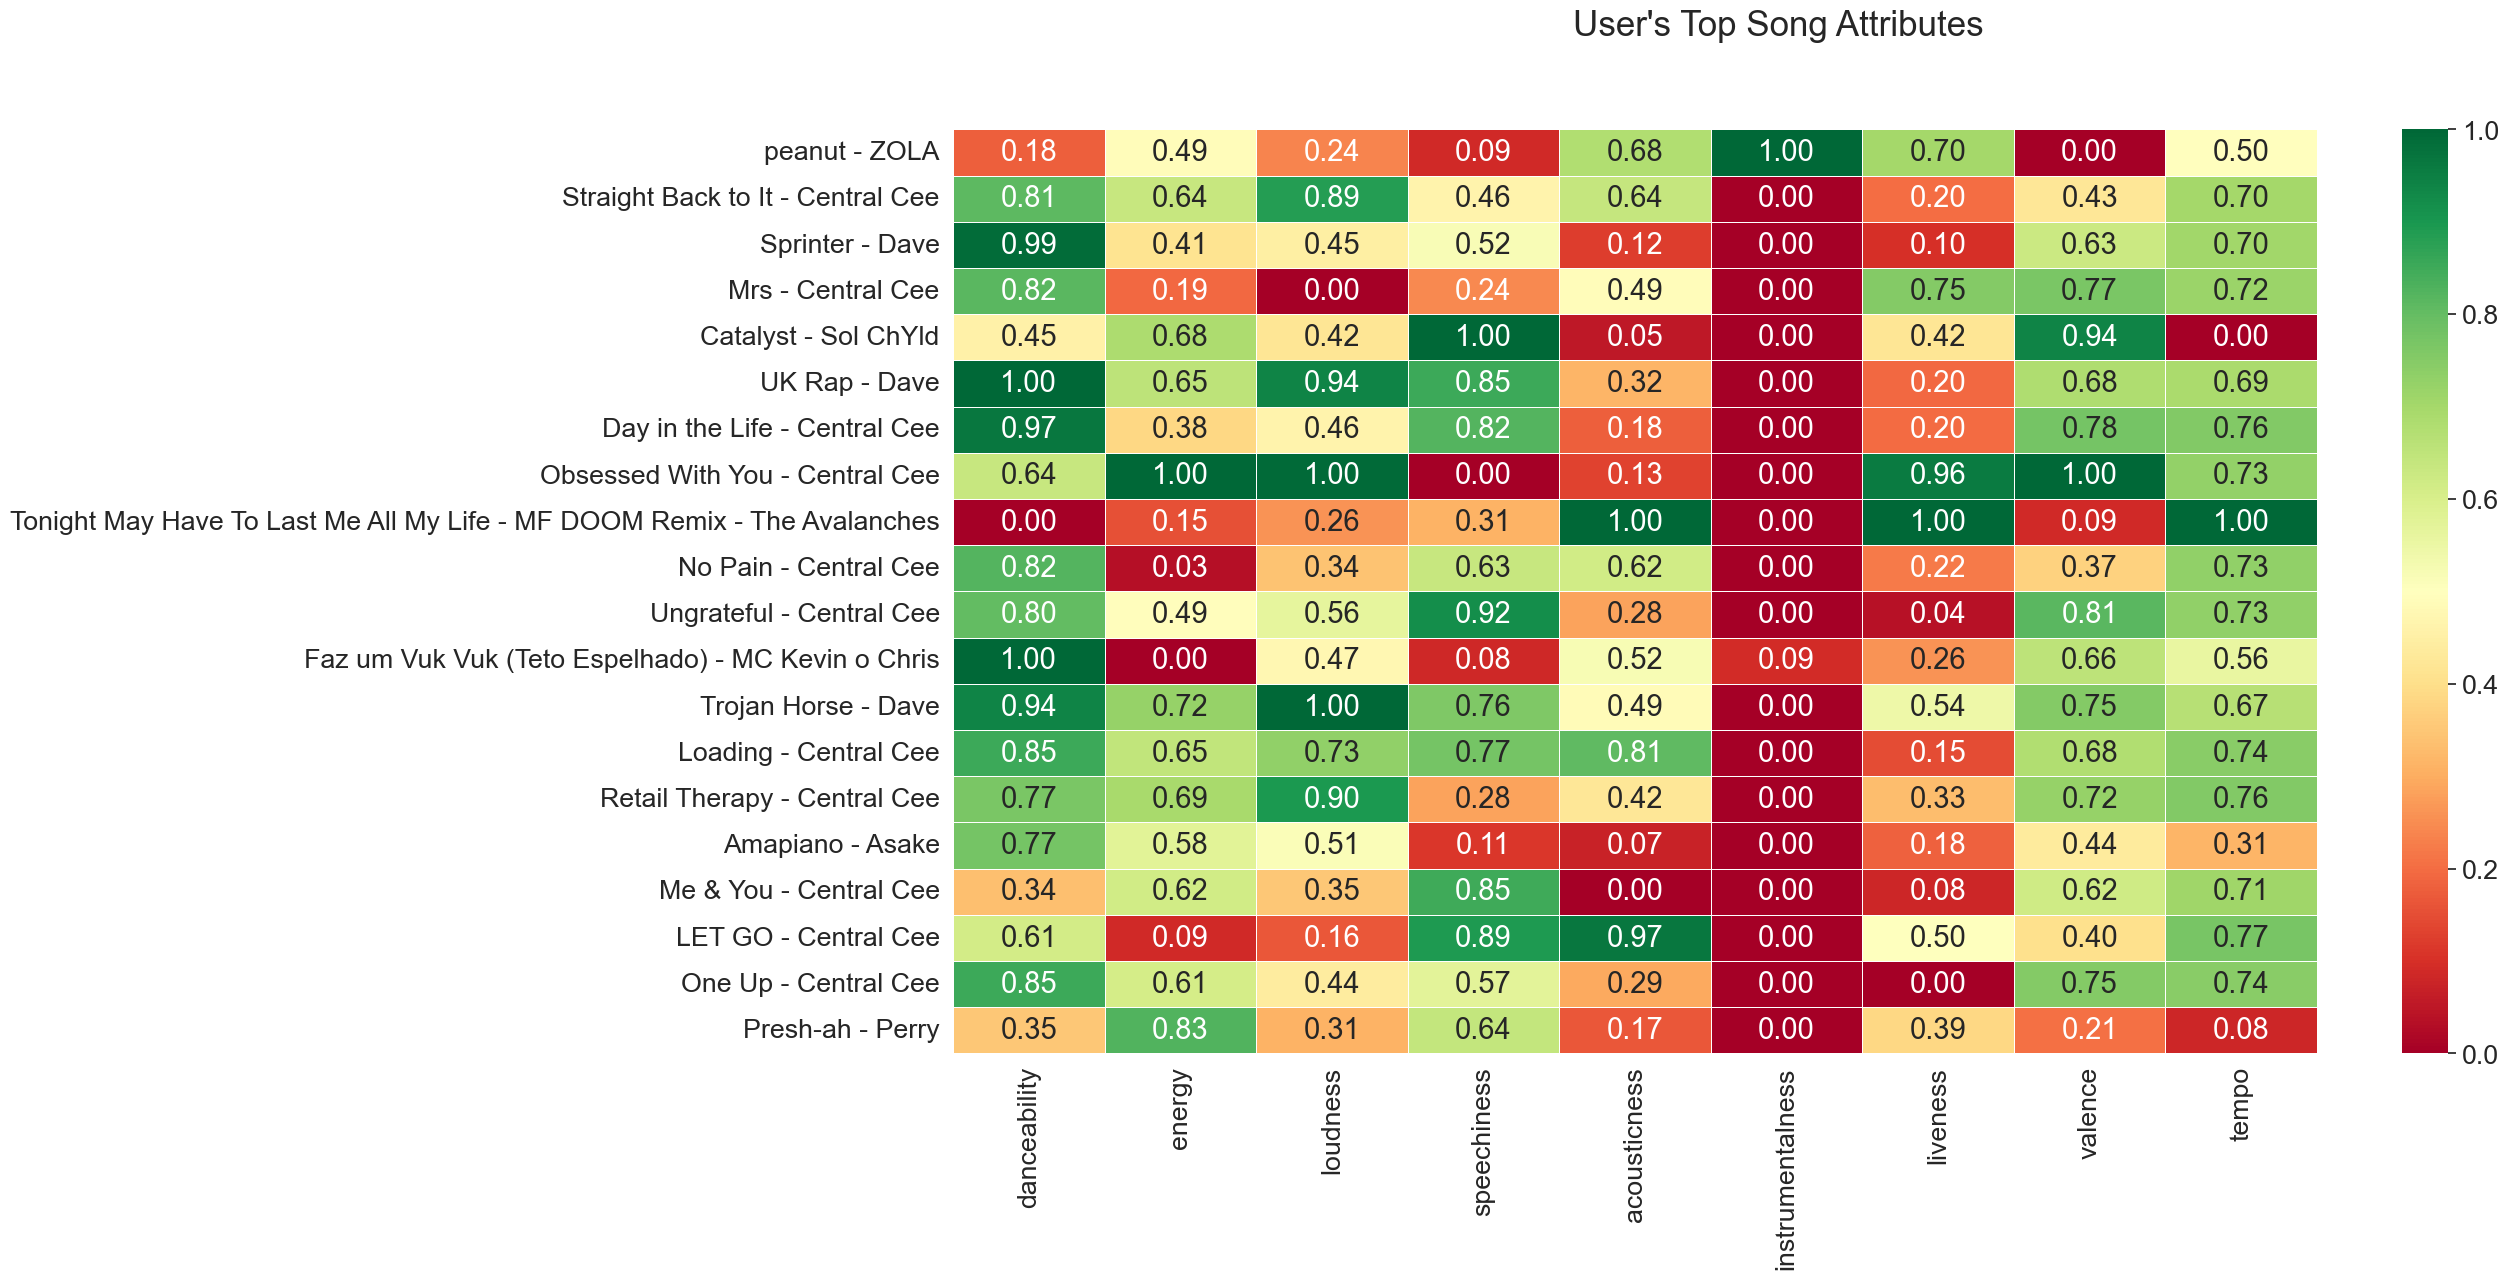

In [20]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your Spotify API credentials
CLIENT_ID = 'd01c5eadb36d491480b00f30c611a373'
CLIENT_SECRET = 'd081a84ed8324d7b97eed49169225a0c'

# Spotify API scopes and other constants
TRACK_ATTRIBUTES = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
OAUTH_SCOPES = "user-top-read"
TIME_RANGE = "medium_term"

# Redirect URI set in your Spotify app - this needs to be handled by your server
REDIRECT_URI = 'http://localhost:9999'

# Authentication manager setup
auth_manager = SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope=OAUTH_SCOPES,
    show_dialog=True,
    cache_path=".spotipyoauthcache"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Fetch the top tracks for the current user
user_top_tracks = sp.current_user_top_tracks(time_range=TIME_RANGE)
top_track_ids = [track["id"] for track in user_top_tracks["items"]]
track_heatmap_index = [f"{track['name']} - {track['artists'][0]['name']}" for track in user_top_tracks["items"]]

# Fetch audio features for the top tracks
audio_features = sp.audio_features(top_track_ids)
df = pd.DataFrame(audio_features)

# Select only the relevant attributes
df = df[TRACK_ATTRIBUTES]
df.index = track_heatmap_index

# Normalize the data for heatmap plotting
scaled_df = (df - df.min()) / (df.max() - df.min())

# Plotting
plt.figure(figsize=(22, 12))
plt.suptitle("User's Top Song Attributes")
sns.set(font_scale=1.75)
sns.heatmap(scaled_df, annot=True, linewidths=.5, cmap="RdYlGn", fmt='.2f')
plt.show()


In [21]:
# Spotify API scopes and other constants
TRACK_ATTRIBUTES = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
OAUTH_SCOPES = "user-top-read playlist-modify-public"
TIME_RANGE = "medium_term"
REDIRECT_URI = 'http://localhost:9999'

# Authentication manager setup
auth_manager = SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope=OAUTH_SCOPES,
    show_dialog=True,
    cache_path=".spotipyoauthcache"
)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Fetch the top tracks for the current user
user_top_tracks = sp.current_user_top_tracks(time_range=TIME_RANGE)
top_track_ids = [track["id"] for track in user_top_tracks["items"]]

# Fetch audio features for the top tracks
audio_features = sp.audio_features(top_track_ids)
df = pd.DataFrame(audio_features)

# Select only the relevant attributes and average them
df = df[TRACK_ATTRIBUTES]
track_attribute_means = df.mean(axis=0).to_dict()

# Use the mean attribute values to find similar tracks using Spotify recommendations
recommended_tracks = sp.recommendations(seed_tracks=top_track_ids[:5], limit=20, **track_attribute_means)

# Get the IDs of the recommended tracks
recommended_track_ids = [track["id"] for track in recommended_tracks["tracks"]]

# Create a new playlist for the current user
user_id = sp.me()["id"]
playlist = sp.user_playlist_create(user_id, "My Recommended Tracks", public=True, description="Tracks recommended based on my top tracks' audio attributes.")

# Add the recommended tracks to the new playlist
sp.playlist_add_items(playlist["id"], recommended_track_ids)

print(f"Playlist created: {playlist['name']} - {playlist['external_urls']['spotify']}")

Playlist created: My Recommended Tracks - https://open.spotify.com/playlist/2gZFLxF4K7aZuTKsyaFXku


In [13]:
track_list = []

for track in user_top_tracks["items"]:
    track_data = []
    
    track_data.append(track["name"])
    
    artist_name = track["artists"][0]["name"]
    track_data.append(artist_name)
    
    track_year = track["album"]["release_date"]
    track_data.append(track_year)
    
    track_data.append(track["popularity"])
    
    track_list.append(track_data)

df = pd.DataFrame(track_list, columns=["Track Name", "Artist", "Release Date", "Popularity"])
df.sort_values(by=["Popularity"], ascending=False)

,Track Name,Artist,Release Date,Popularity
2,Sprinter,Dave,2023-06-01,91
11,Faz um Vuk Vuk (Teto Espelhado),MC Kevin o Chris,2023-07-20,86
17,LET GO,Central Cee,2022-12-15,81
5,UK Rap,Dave,2023-06-04,77
13,Loading,Central Cee,2021-03-12,75
18,One Up,Central Cee,2022-10-13,74
7,Obsessed With You,Central Cee,2022-02-25,74
12,Trojan Horse,Dave,2023-06-04,74
6,Day in the Life,Central Cee,2021-03-12,71
15,Amapiano,Asake,2023-05-23,68


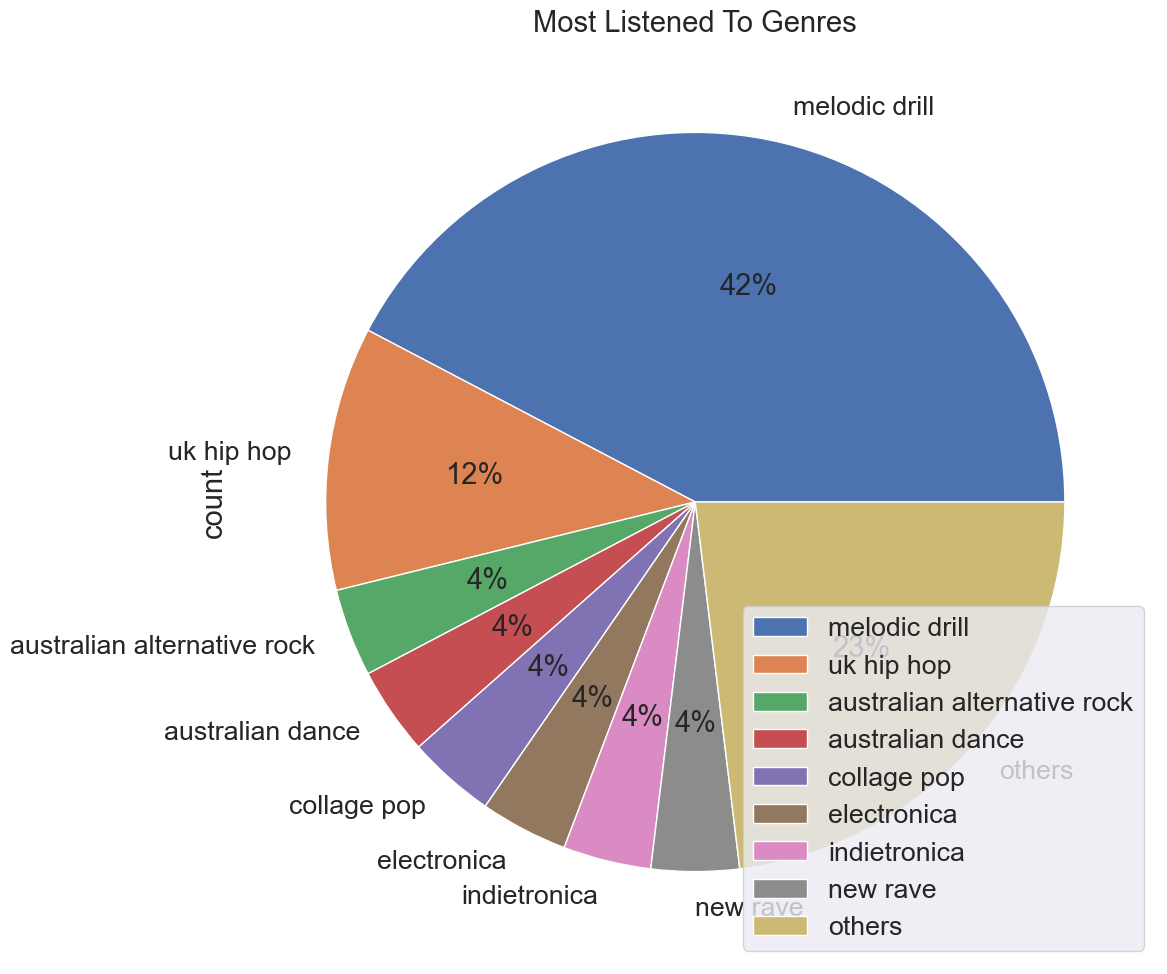

In [18]:
user_genres_list = []
user_genres_count = []

# Before the loop, initialize artist_list as an empty list
artist_list = []

for track in user_top_tracks["items"]:
    artist_id = track["artists"][0]["id"]
    artist_list.append(sp.artist(artist_id))
    
user_genres = {}
genre_dict = {"genre": [], "count": []}
    
for artist in artist_list:
    for genre in artist["genres"]:
        if genre in user_genres:
            user_genres[genre] = user_genres[genre] + 1
        else:
            user_genres[genre] = 1

for genre, count in user_genres.items():
    genre_dict["genre"].append(genre)
    genre_dict["count"].append(count)

df = pd.DataFrame(genre_dict)

df2 = df[:8].copy()

new_row = pd.DataFrame(data = {
    'genre' : ['others'],
    'count' : [df['count'][8:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.plot(kind = 'pie', y = 'count', labels = df2['genre'], figsize=(12, 12), autopct='%1.0f%%', title="Most Listened To Genres")

plt.show()